<a href="https://colab.research.google.com/github/123sh/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
from keras import layers

In [2]:
import matplotlib.pyplot as plt


In [3]:
(X_train,Y_train),(_,_)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

2


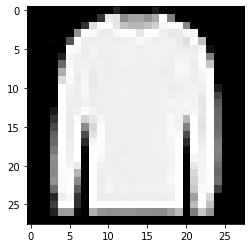

In [5]:
i = np.random.randint(0, 60000)
print(Y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [6]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype("float32")

In [7]:
type(X_train),X_train.shape

(numpy.ndarray, (60000, 28, 28, 1))

In [8]:
X_train.min(),X_train.max()

(0.0, 255.0)

In [9]:
X_train=(X_train-127.5)/127.5

In [10]:
X_train.min(),X_train.max()

(-1.0, 1.0)

In [11]:
buffer_size=60000
batch_size=256


In [12]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [13]:
# IMG GENERATOR 

def build_generator():
  network=keras.Sequential()
  network.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  network.add(layers.Reshape((7,7,256)))

  network.add(layers.Conv2DTranspose(128,(5,5),padding="same",use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  
  network.add(layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Conv2DTranspose(1,(5,5),strides=(2,2),padding="same",activation="tanh",use_bias=False))
  # network.summary()
  return network





In [14]:
build_generator()

In [15]:
noise=tf.random.normal([1,100])
#IMG GENERATOR
img_Generator=build_generator()
  

In [16]:
generate_noise_img=img_Generator(noise,training=False)

In [17]:
generate_noise_img.shape

TensorShape([1, 28, 28, 1])

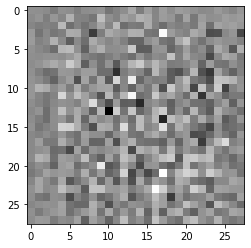

In [18]:
plt.imshow(generate_noise_img[0,:,:,0],cmap="gray");

In [19]:
def build_dicriminator():
  network=keras.Sequential()

  network.add(layers.Conv2D(64,(5,5),strides=(2,2),padding="same",input_shape=([28,28,1])))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))
  
  # 7*7*128
  network.add(layers.Conv2D(128,(5,5),strides=(2,2),padding="same"))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))
  #Flatten
  network.add(layers.Flatten())
  network.add(layers.Dense(1))
  
  #network.summary()
  
  return network






In [20]:
build_dicriminator()

In [21]:
Discriminator=build_dicriminator()

In [22]:
#calculating loss

cross_entropy=keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(expected_output,fake_output):
  real_Loss=cross_entropy(tf.ones_like(expected_output),expected_output)
  fake_Loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
  total_Loss=real_Loss+fake_Loss
  return total_Loss


def generator_Loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)



In [23]:
#Optimizer
generator_Optimizer=keras.optimizers.Adam(learning_rate=0.00001)
discriminator_Optimizer=keras.optimizers.Adam(learning_rate=0.00001)

In [24]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16


In [25]:
@tf.function
def train_steps(images):
  noise = tf.random.normal([batch_size, noise_dim])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = img_Generator(noise, training = True)

    expected_output = Discriminator(images, training = True)
    fake_output = Discriminator(generated_images, training = True)

    gen_loss = generator_Loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, img_Generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, Discriminator.trainable_variables)

  generator_Optimizer.apply_gradients(zip(gradients_of_generator, img_Generator.trainable_variables))
  discriminator_Optimizer.apply_gradients(zip(gradients_of_discriminator, Discriminator.trainable_variables))

In [27]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [28]:
test_images.shape

TensorShape([16, 100])

In [26]:
def train(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      #print(image_batch.shape)
      train_steps(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = img_Generator(test_images, training = False)
    fig = plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()


Epoch:  1


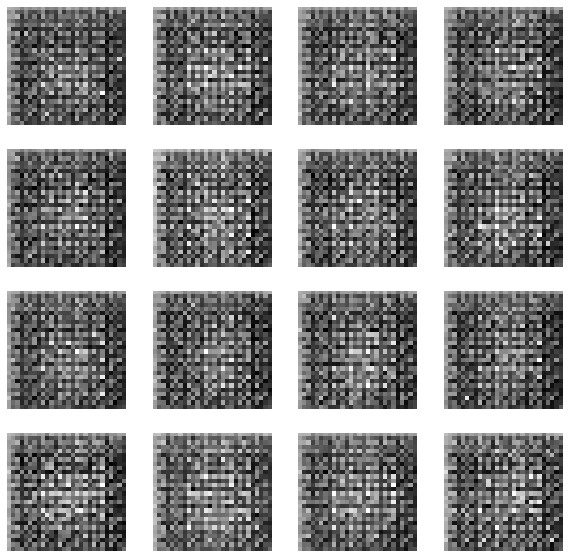

Epoch:  2


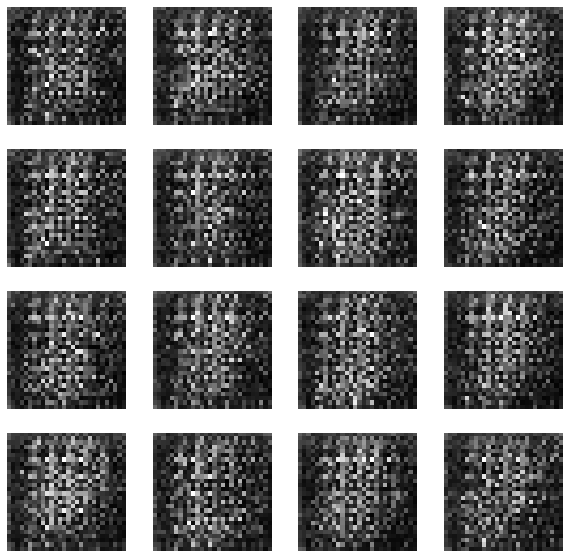

Epoch:  3


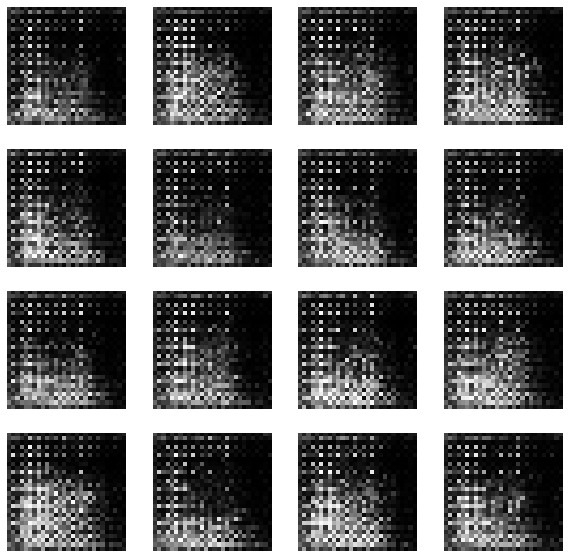

Epoch:  4


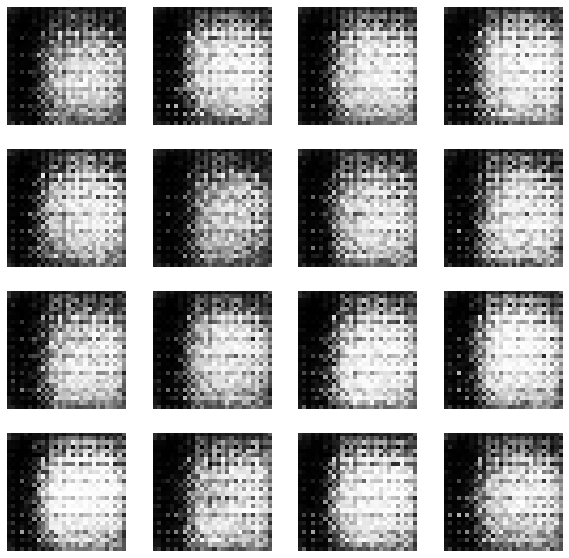

Epoch:  5


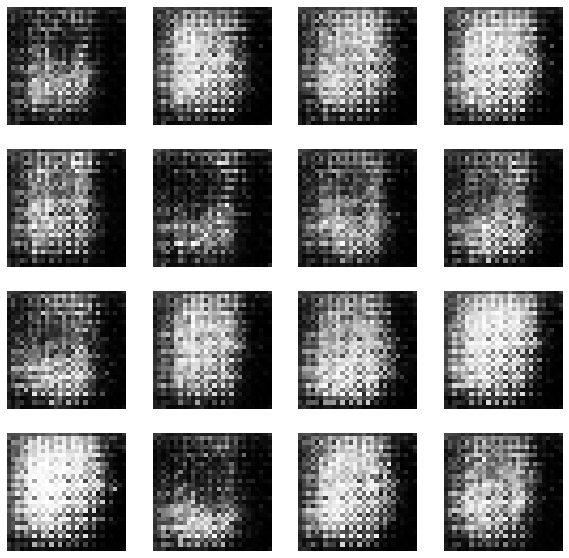

Epoch:  6


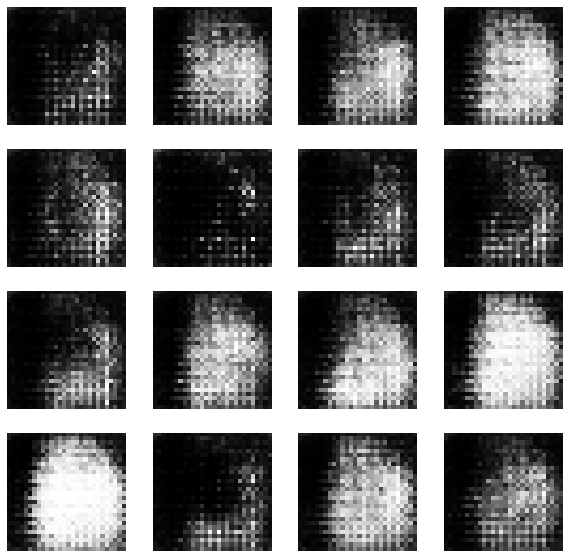

Epoch:  7


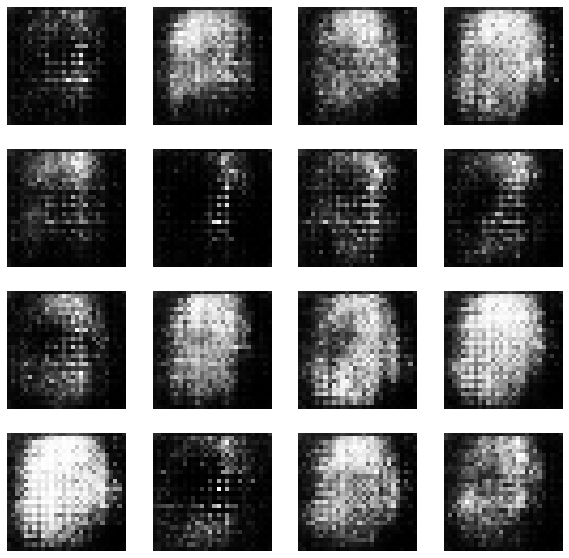

Epoch:  8


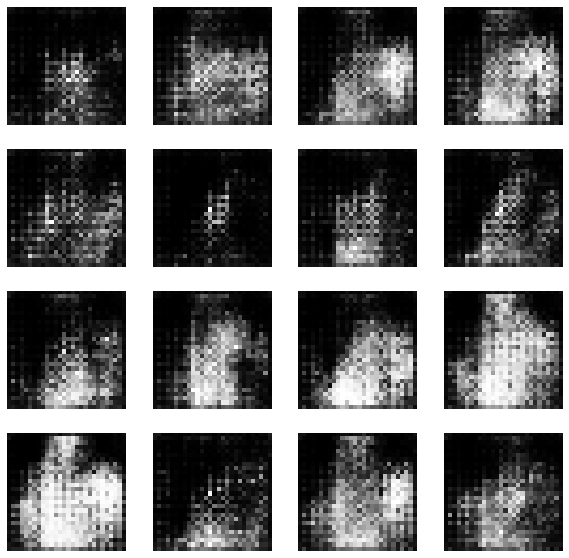

Epoch:  9


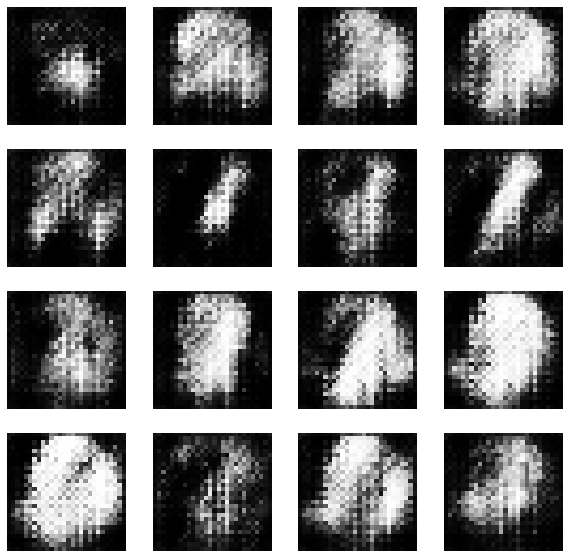

Epoch:  10


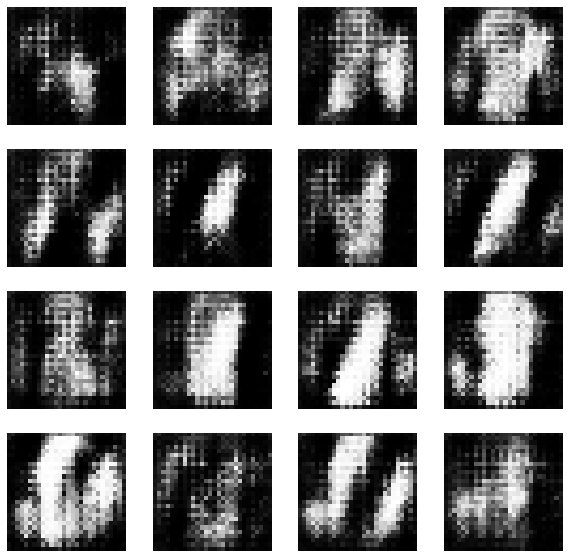

Epoch:  11


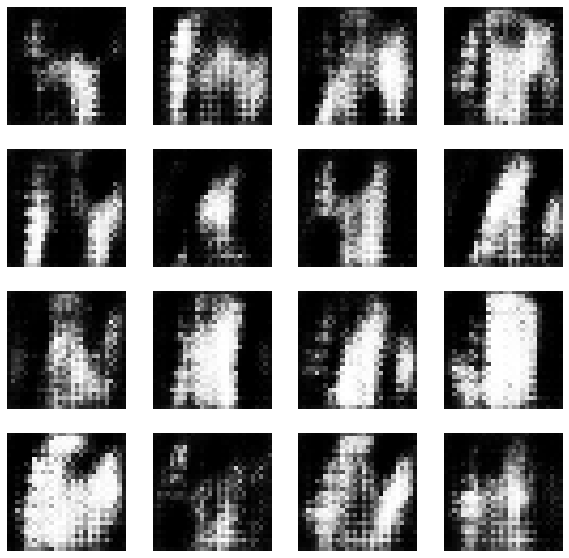

Epoch:  12


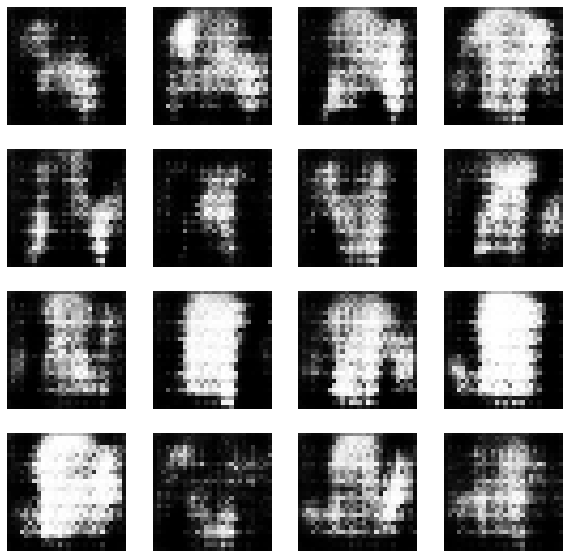

Epoch:  13


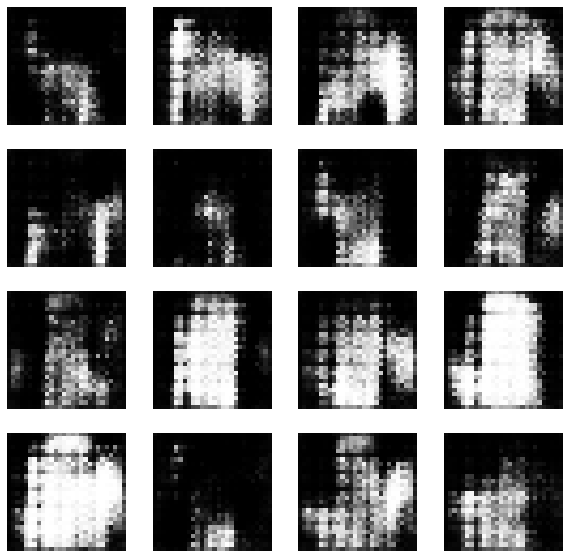

Epoch:  14


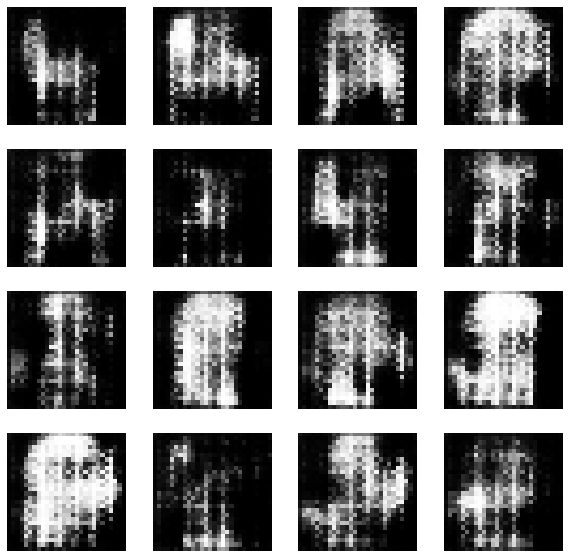

Epoch:  15


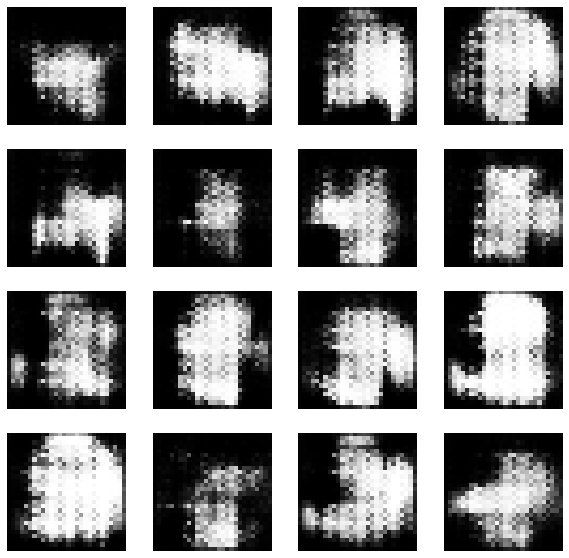

Epoch:  16


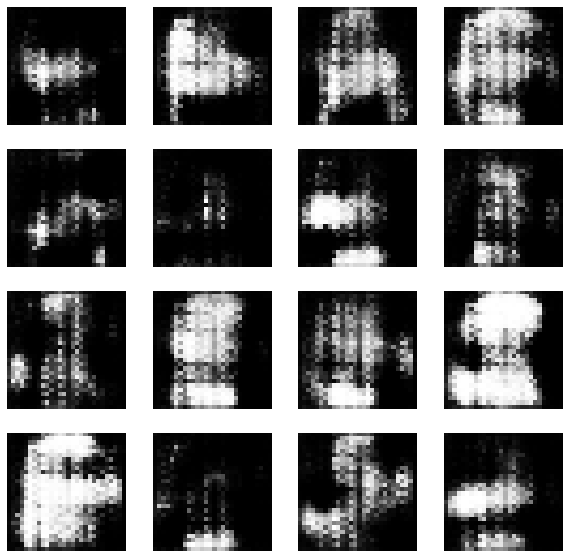

Epoch:  17


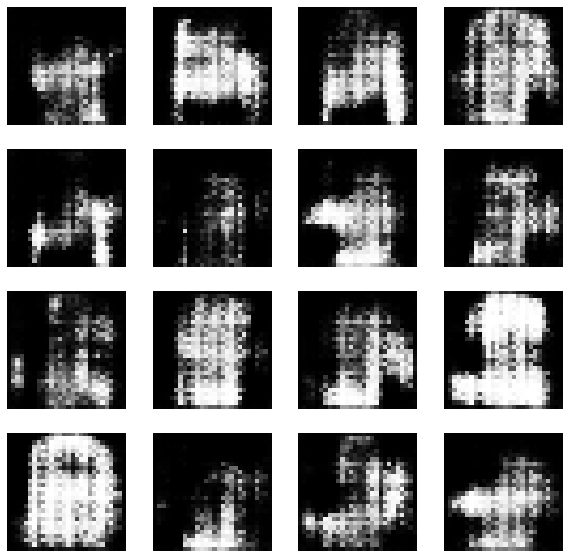

Epoch:  18


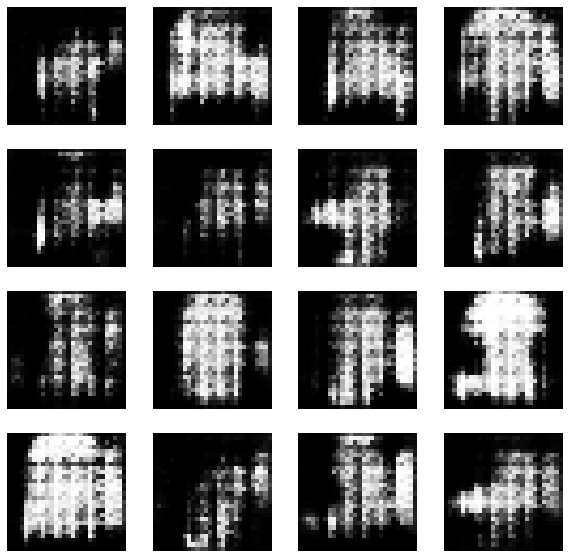

Epoch:  19


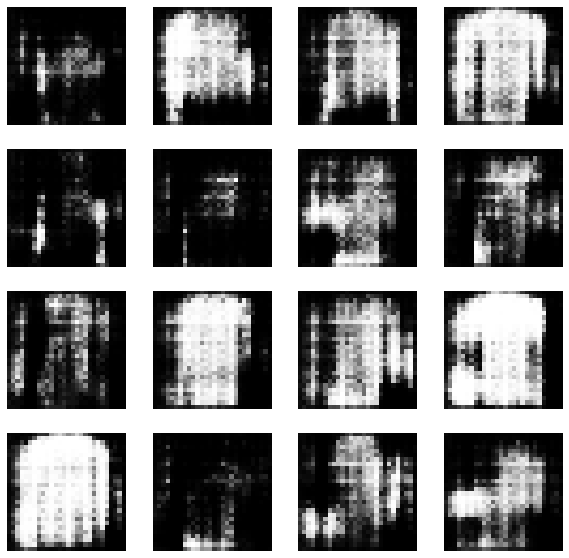

Epoch:  20


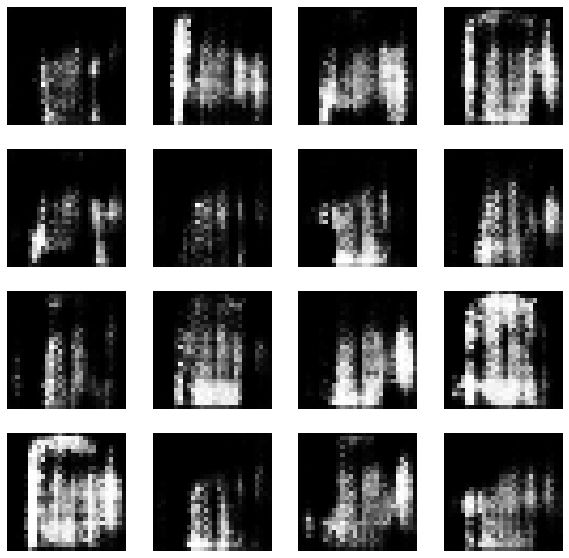

Epoch:  21


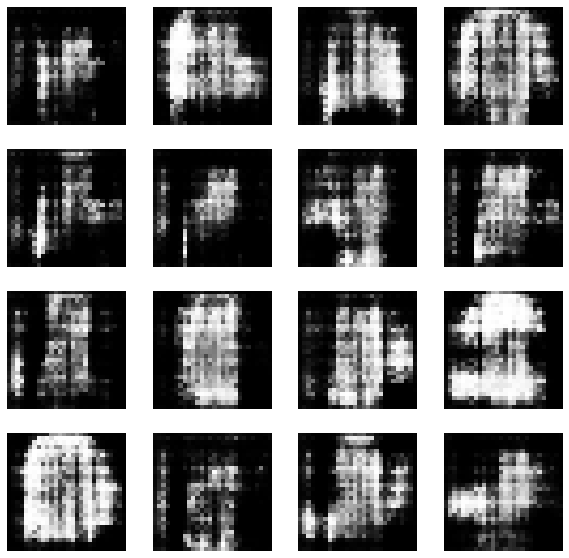

Epoch:  22


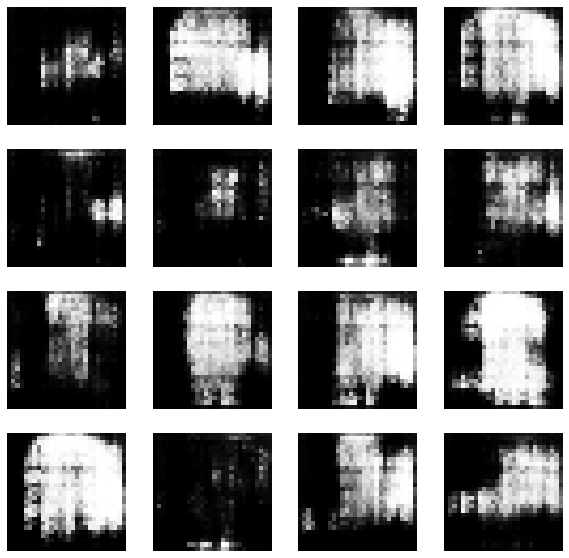

Epoch:  23


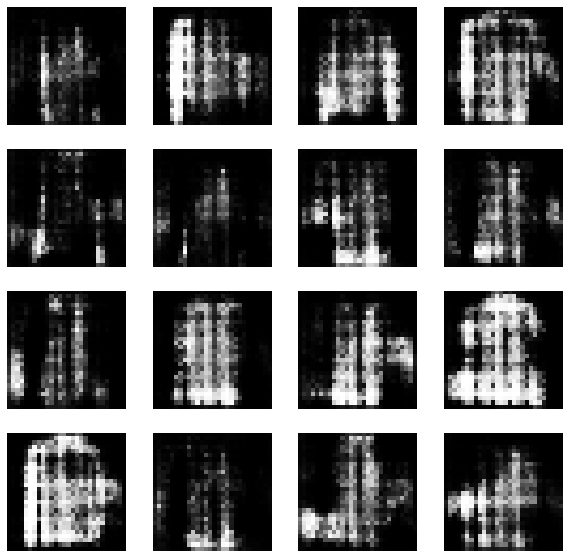

Epoch:  24


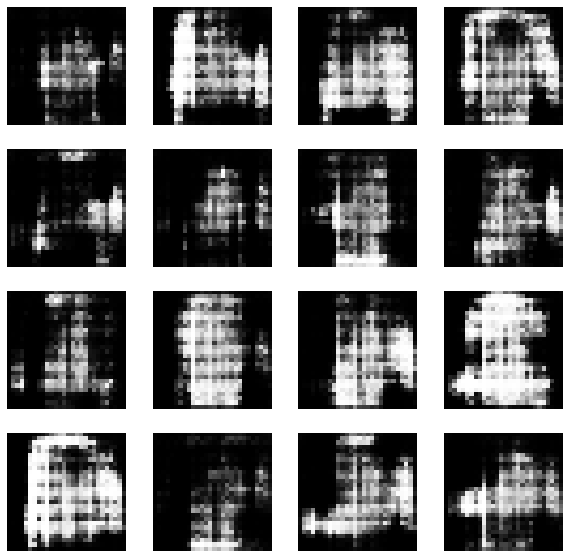

Epoch:  25


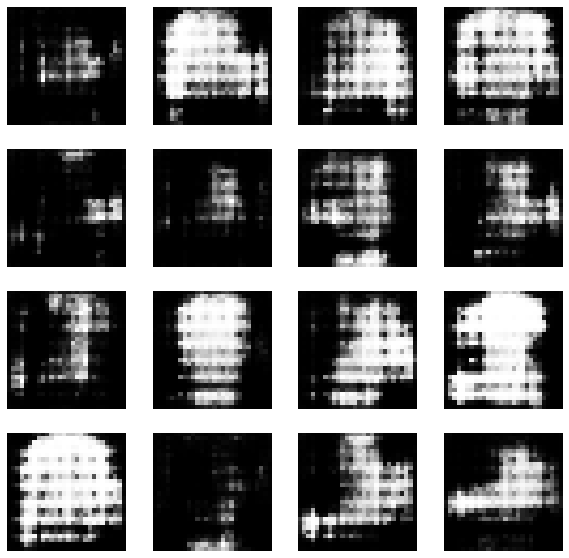

Epoch:  26


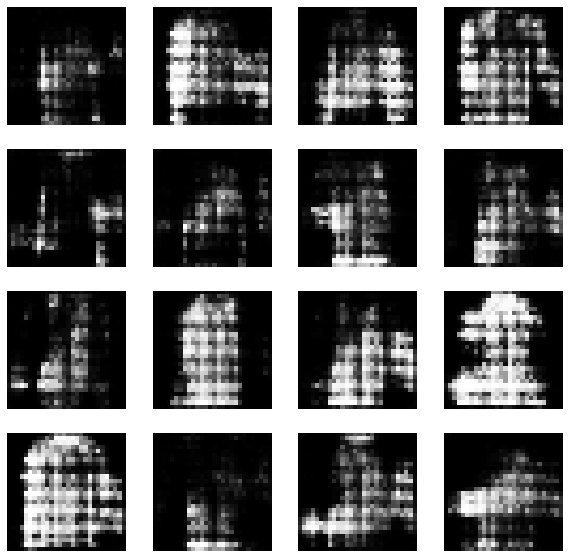

Epoch:  27


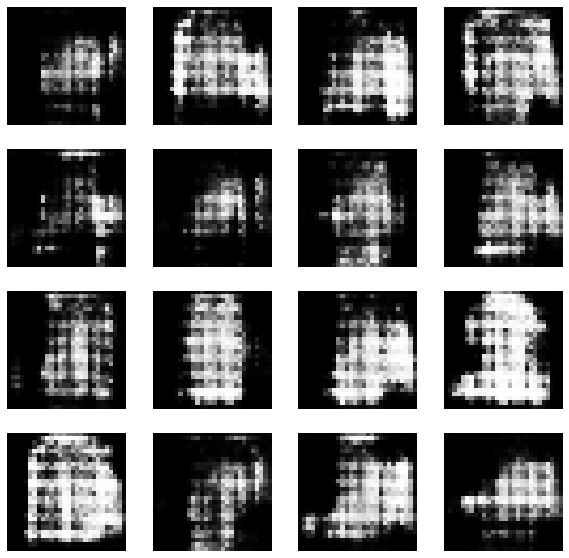

Epoch:  28


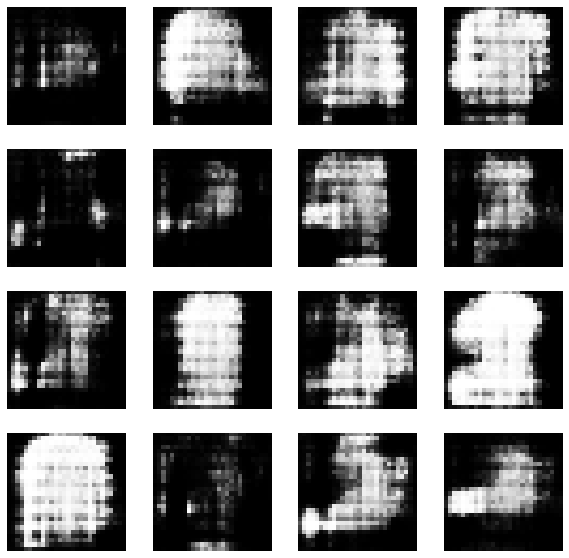

Epoch:  29


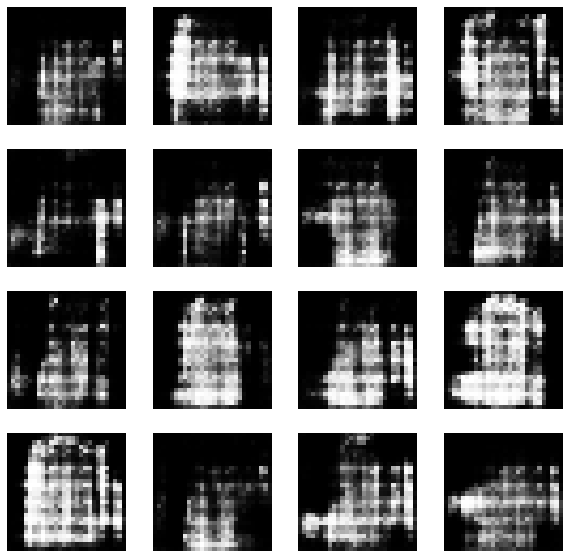

Epoch:  30


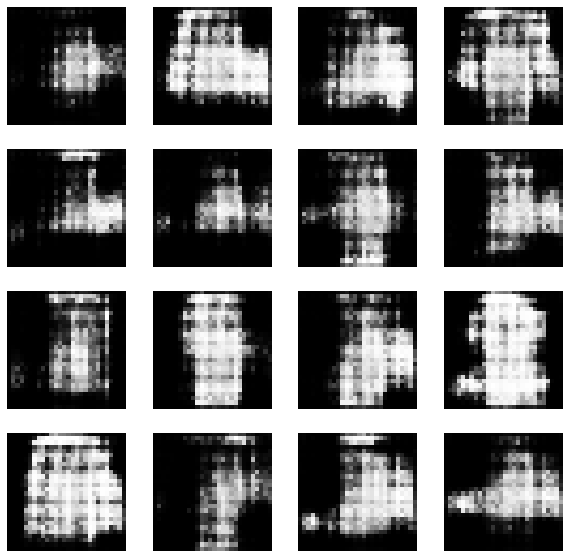

Epoch:  31


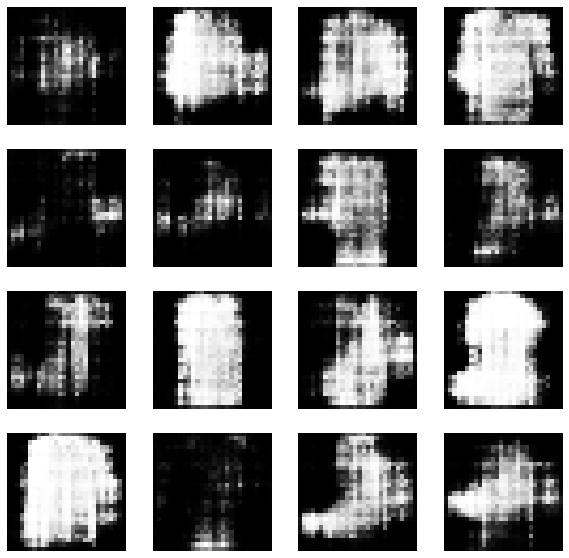

Epoch:  32


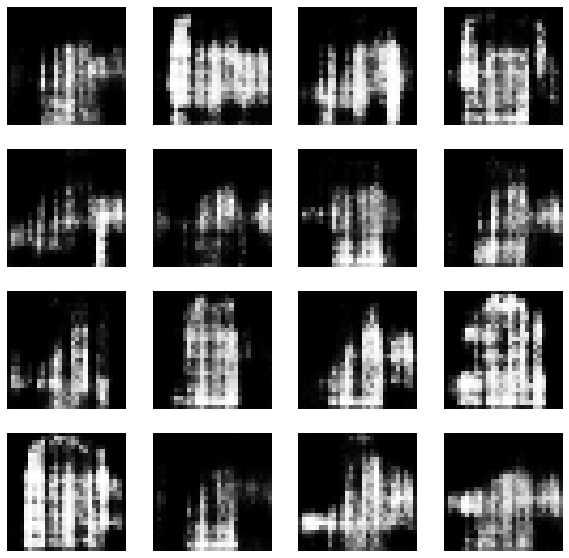

Epoch:  33


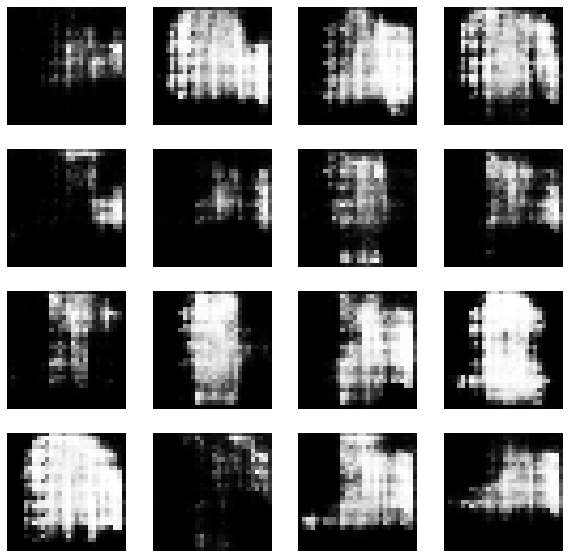

Epoch:  34


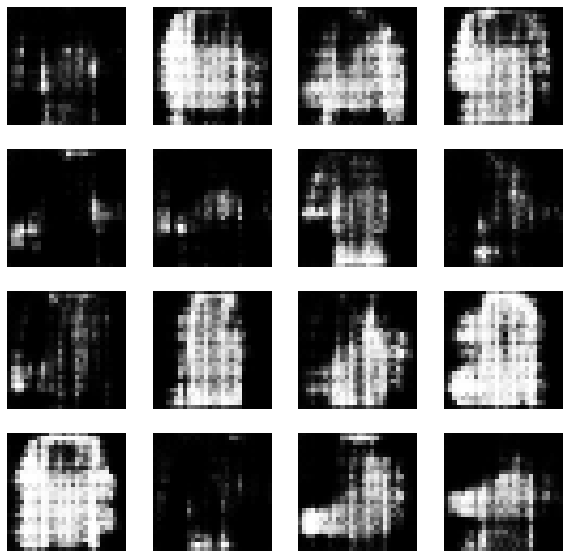

Epoch:  35


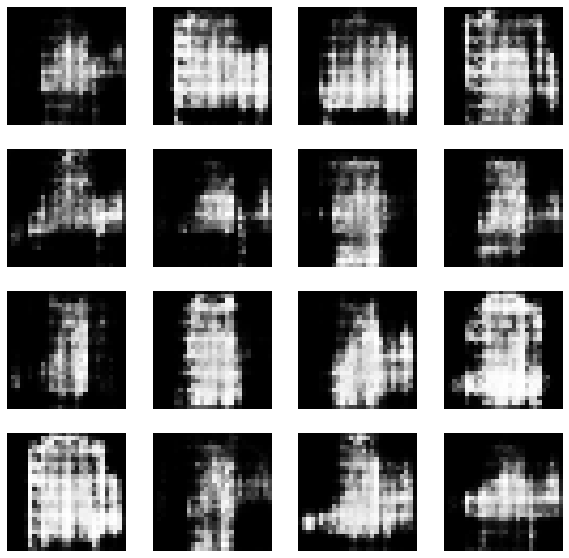

Epoch:  36


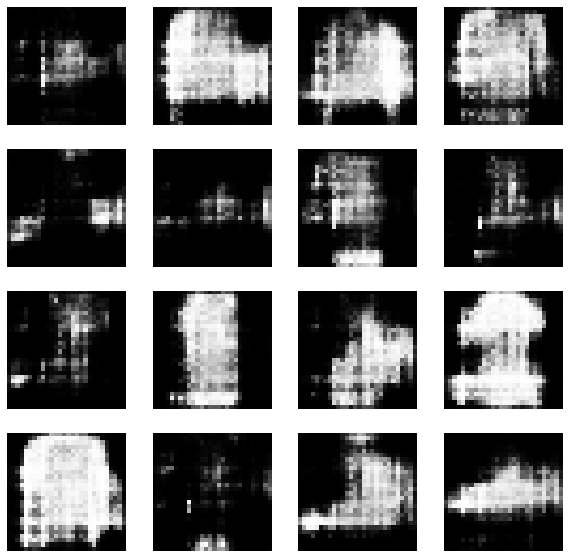

Epoch:  37


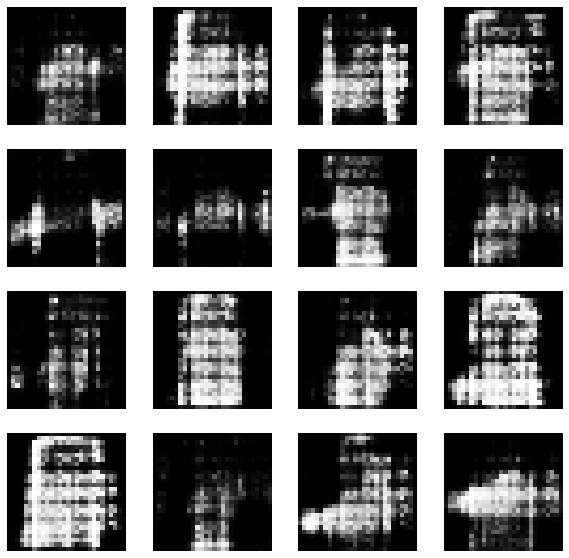

Epoch:  38


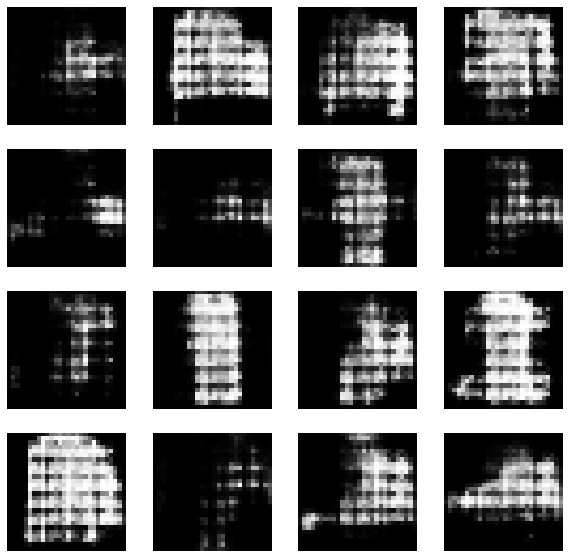

Epoch:  39


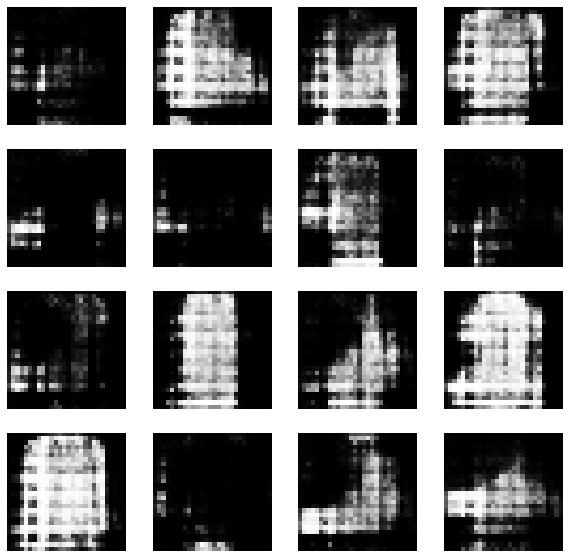

Epoch:  40


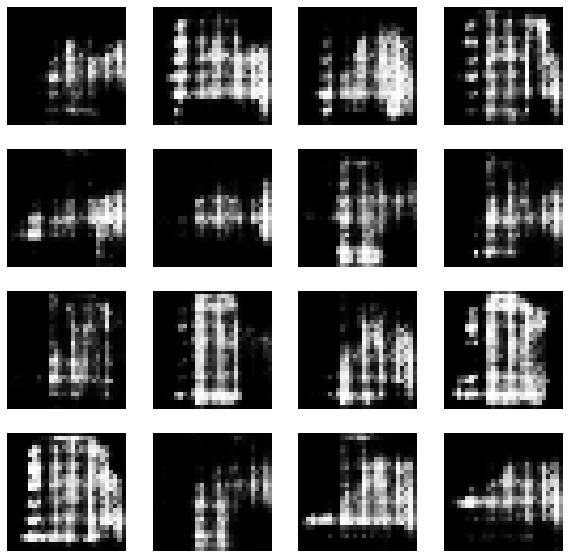

Epoch:  41


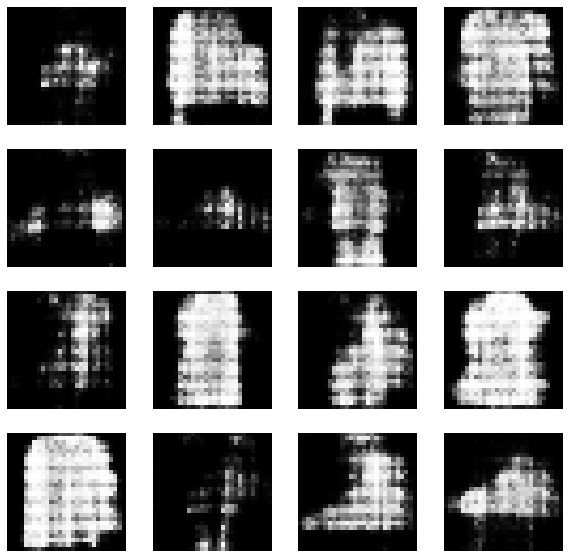

Epoch:  42


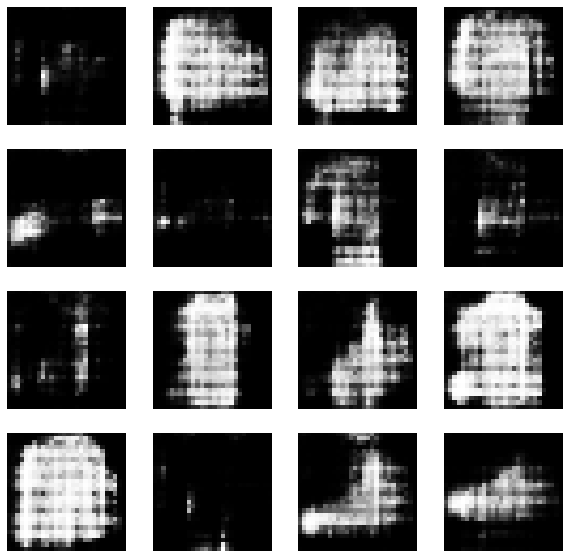

Epoch:  43


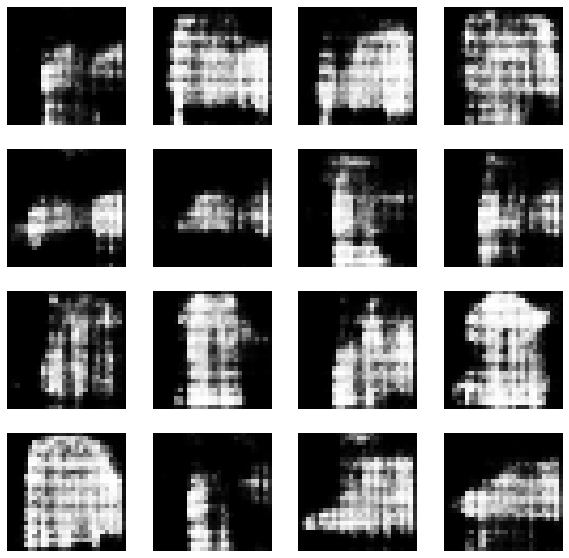

Epoch:  44


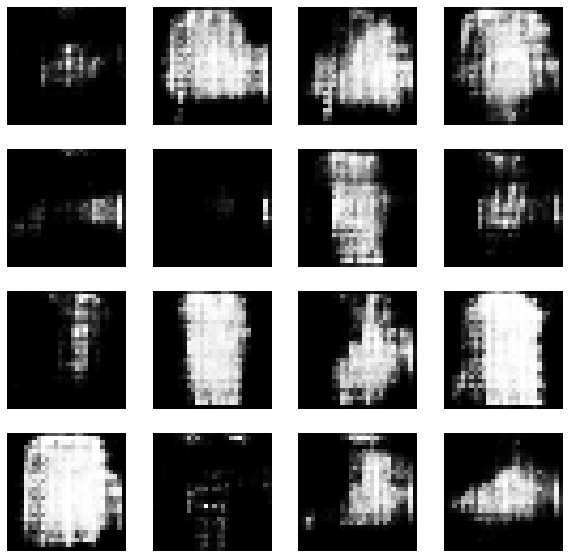

Epoch:  45


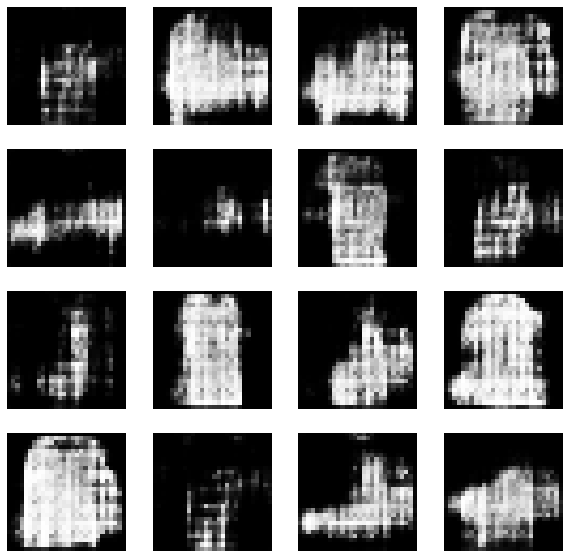

Epoch:  46


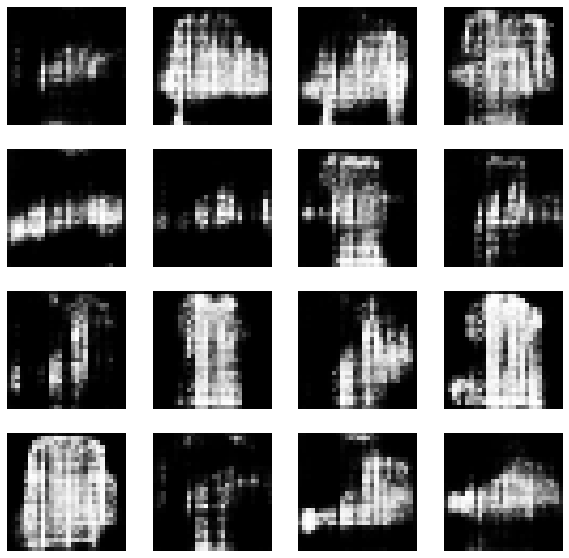

Epoch:  47


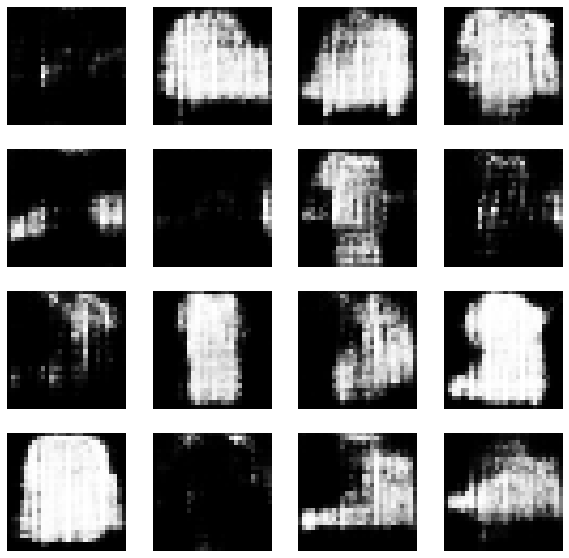

Epoch:  48


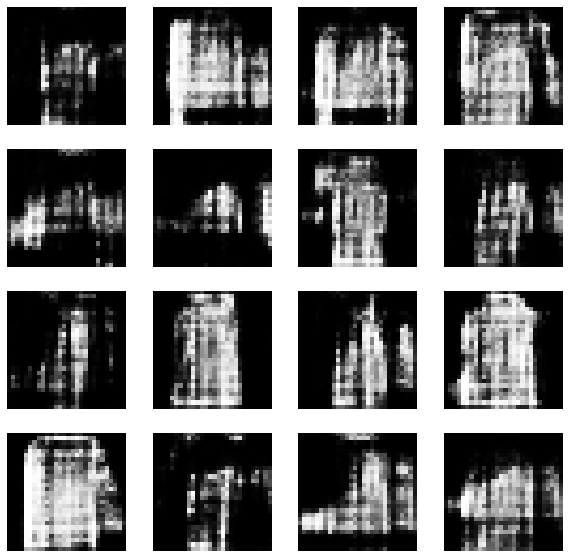

Epoch:  49


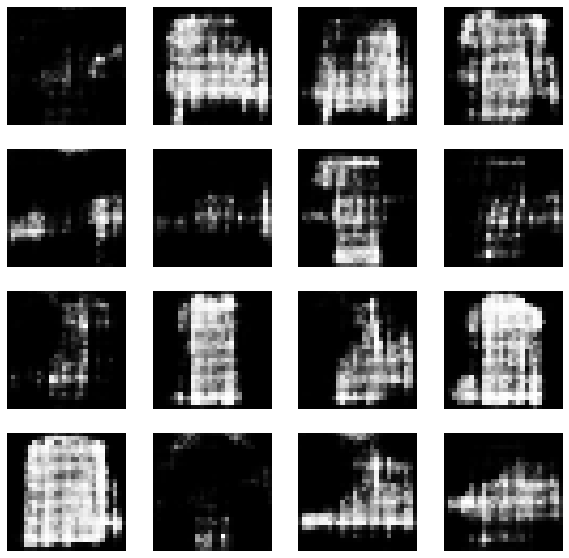

Epoch:  50


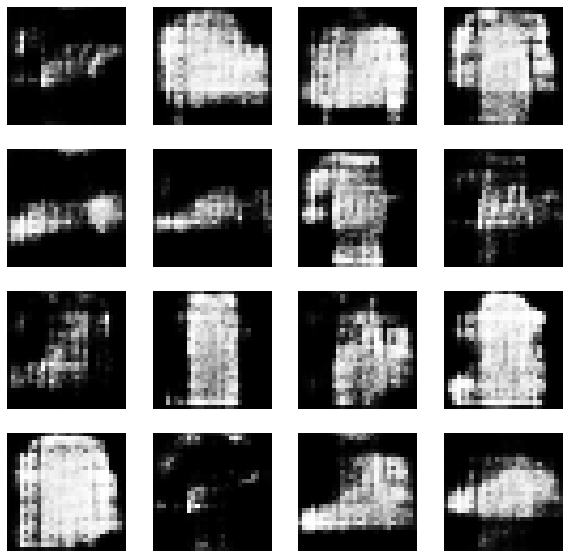

Epoch:  51


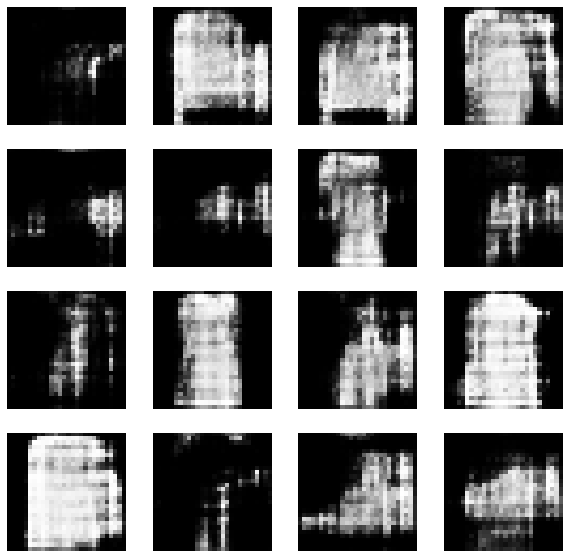

Epoch:  52


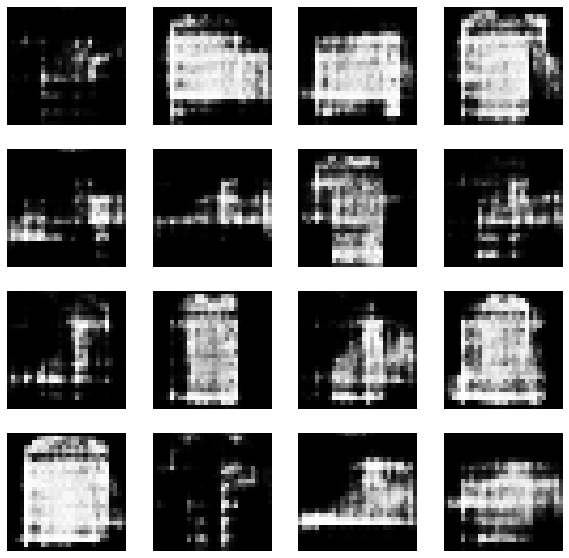

Epoch:  53


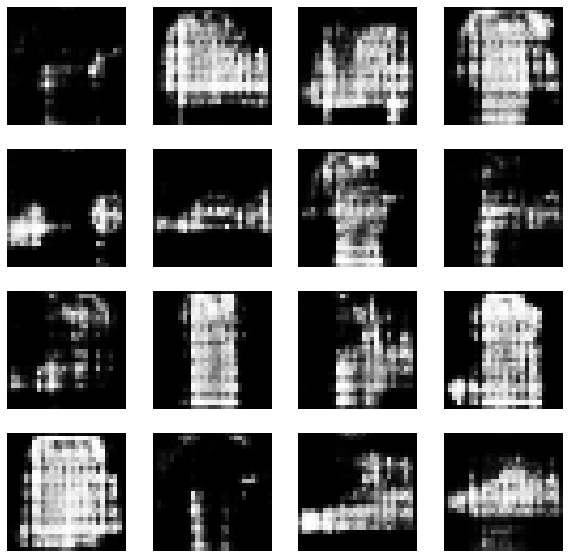

Epoch:  54


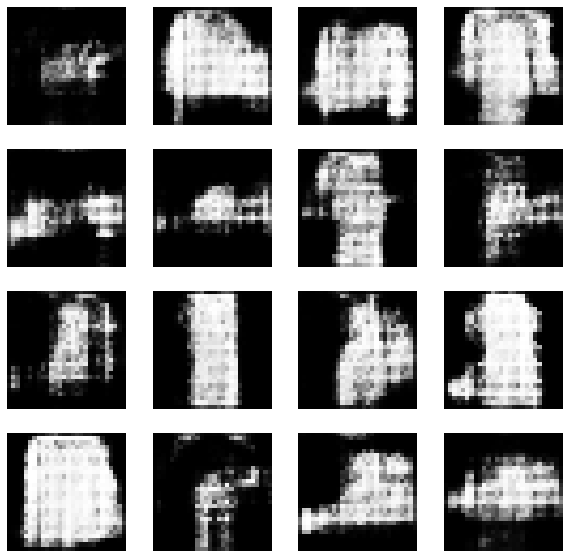

Epoch:  55


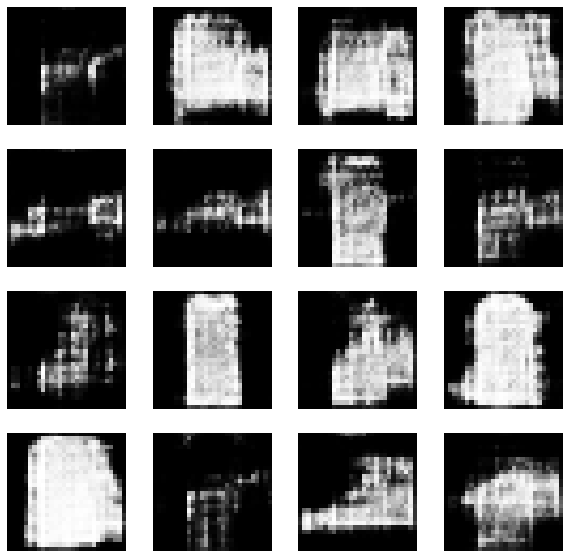

Epoch:  56


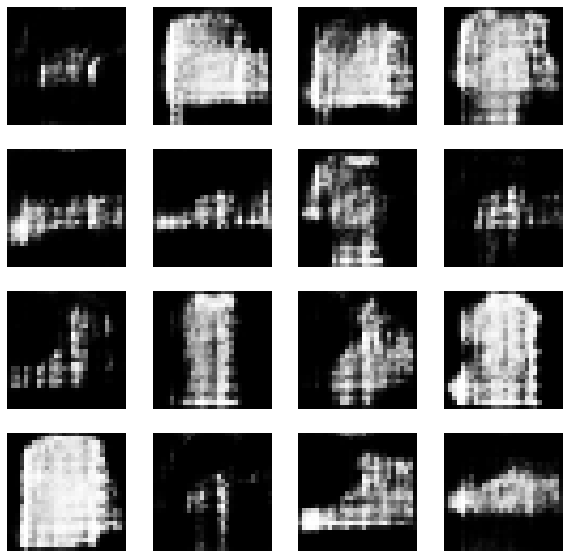

Epoch:  57


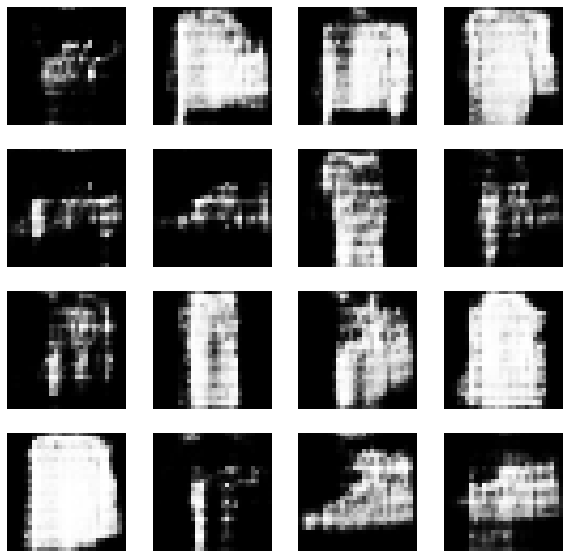

Epoch:  58


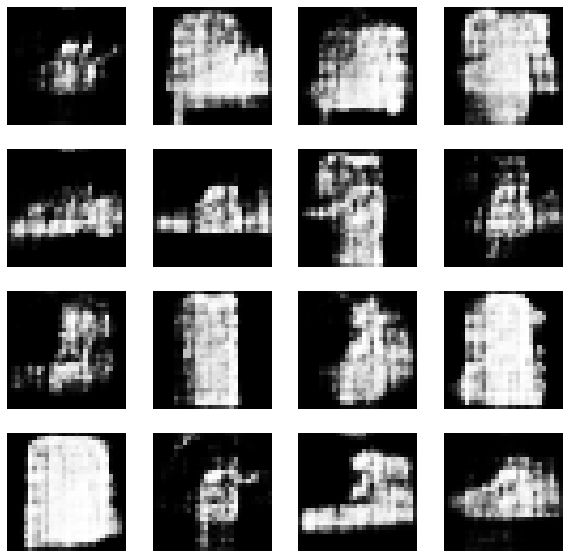

Epoch:  59


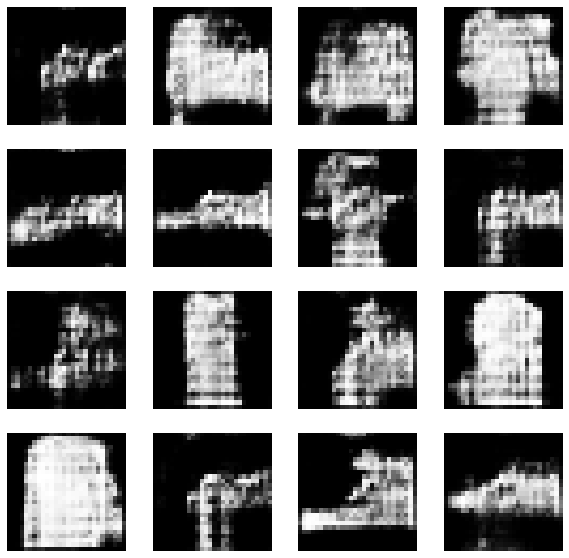

Epoch:  60


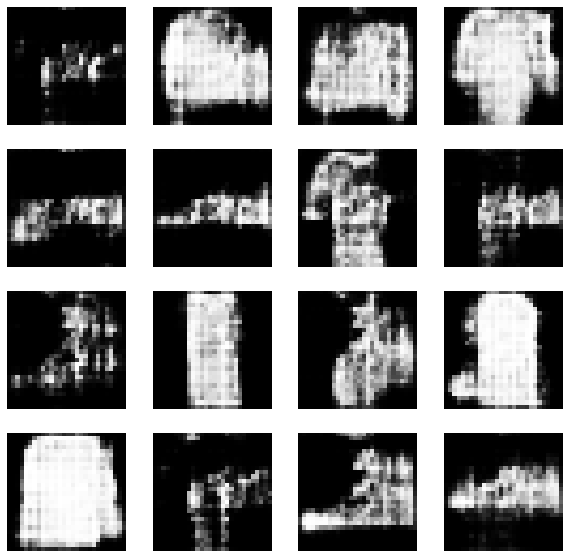

Epoch:  61


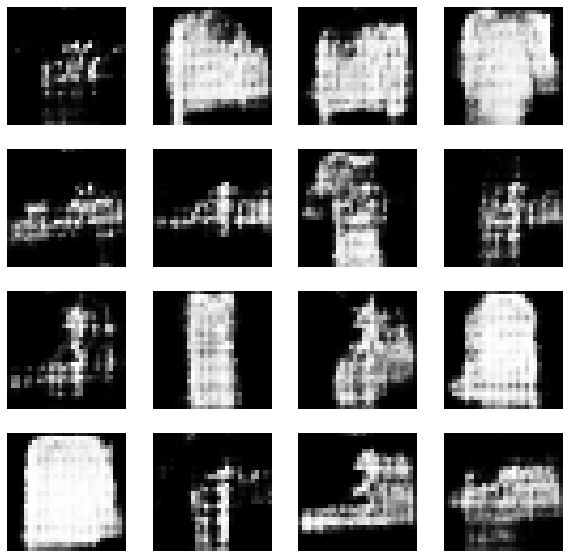

Epoch:  62


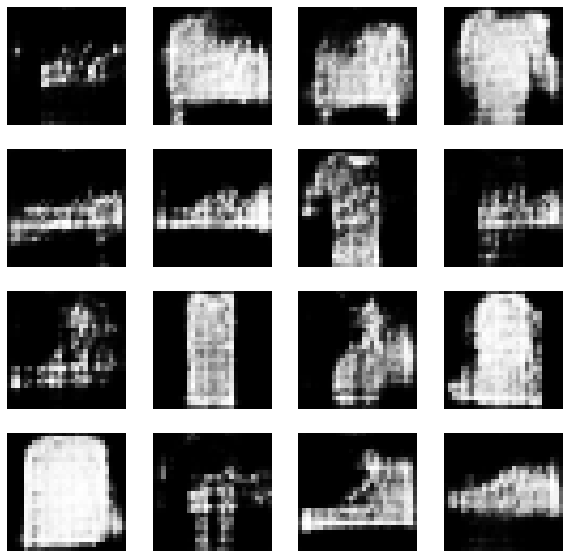

Epoch:  63


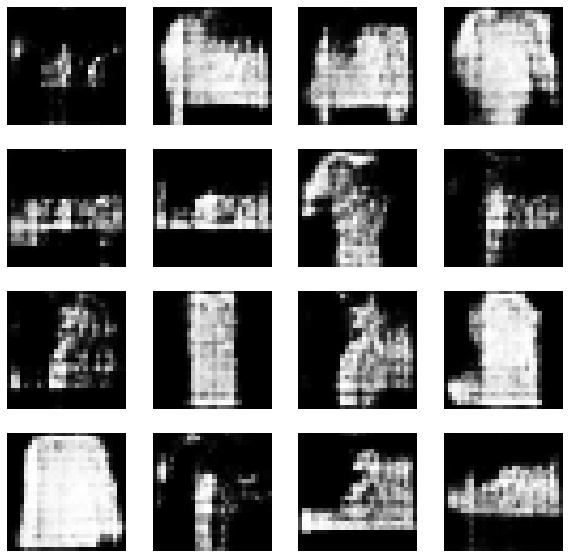

Epoch:  64


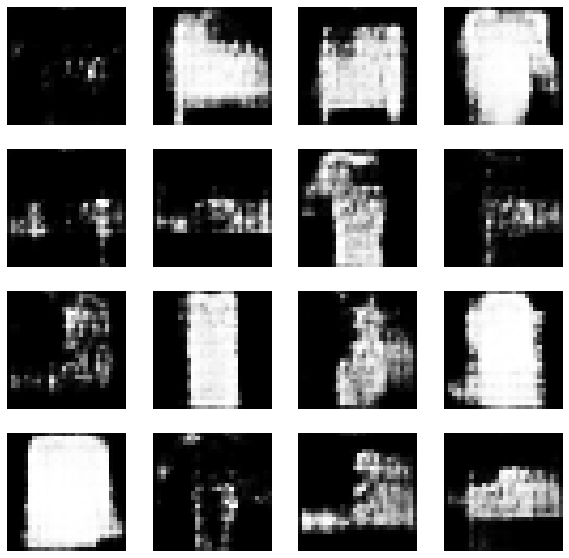

Epoch:  65


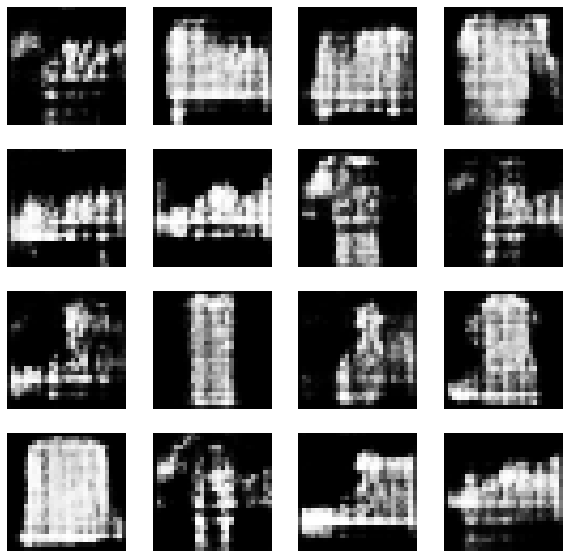

Epoch:  66


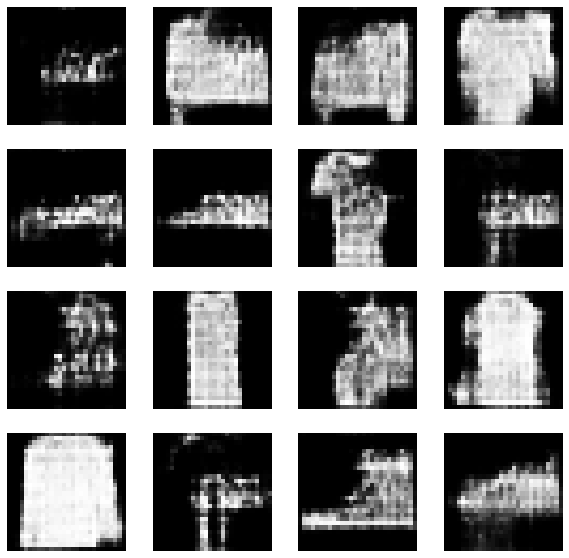

Epoch:  67


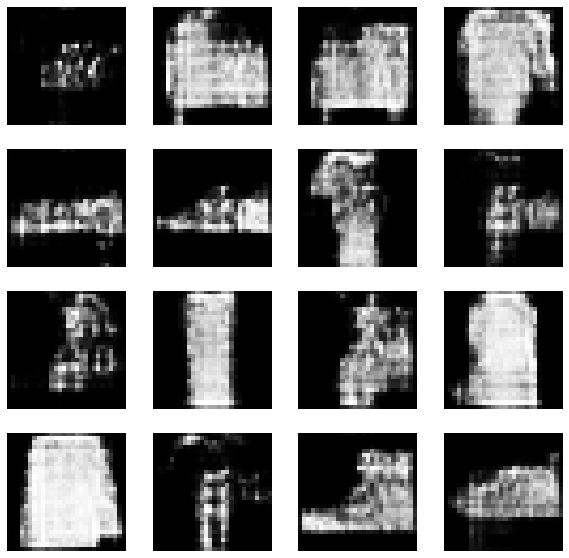

Epoch:  68


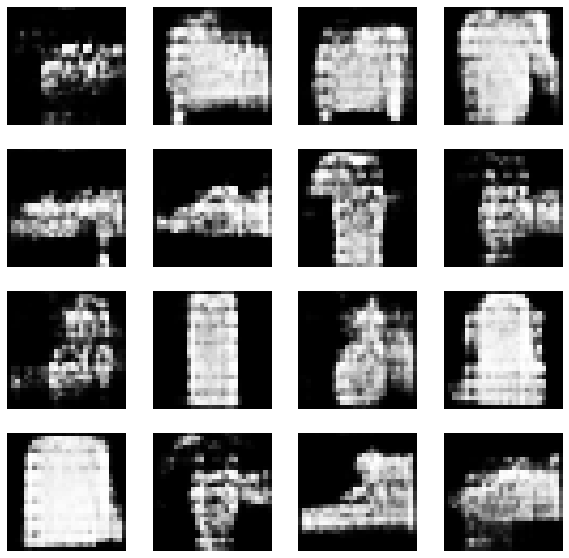

Epoch:  69


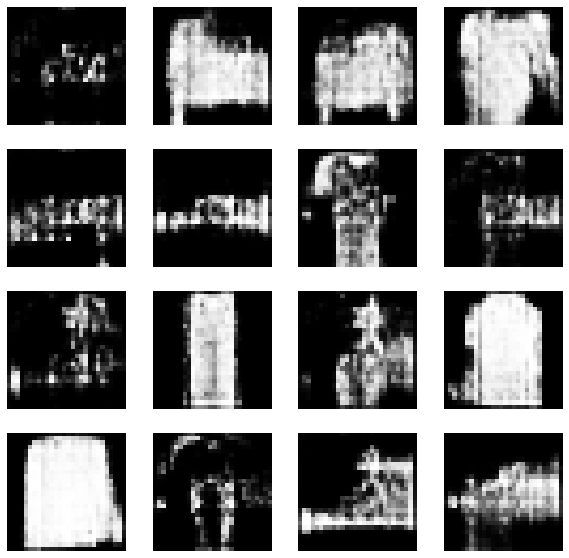

Epoch:  70


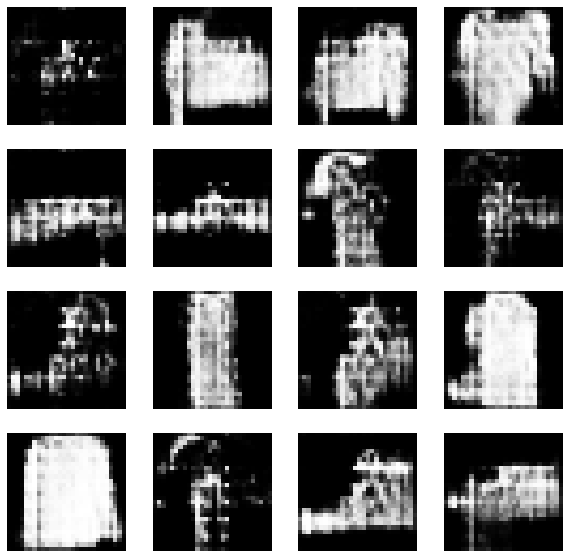

Epoch:  71


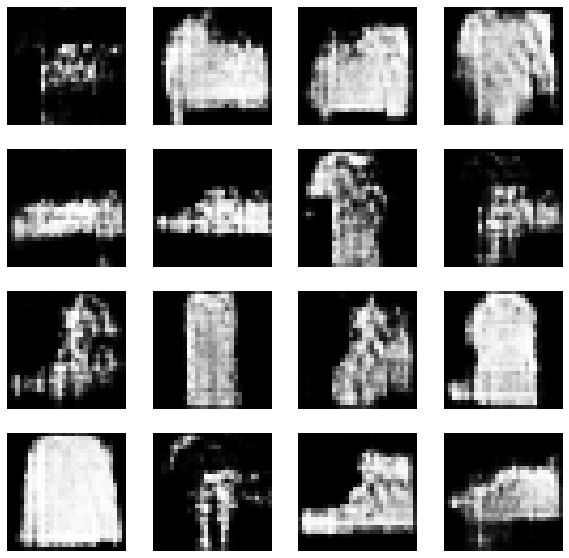

Epoch:  72


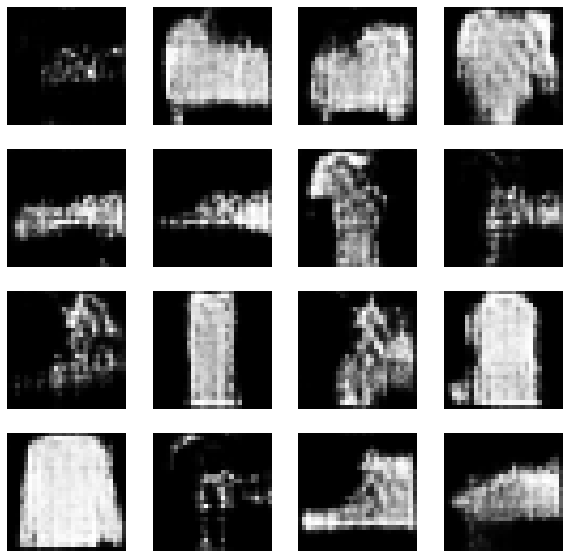

Epoch:  73


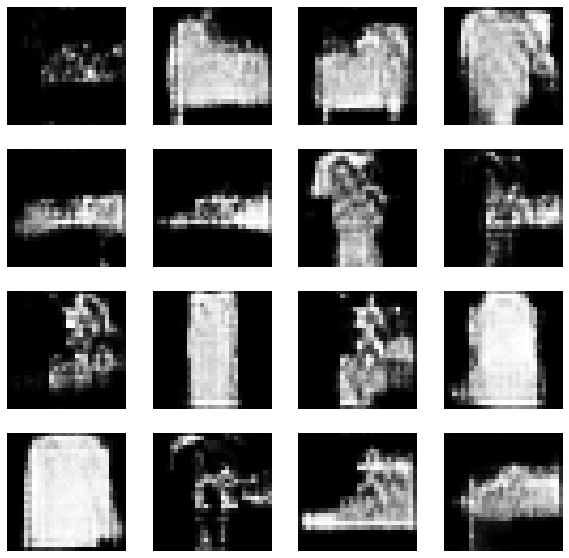

Epoch:  74


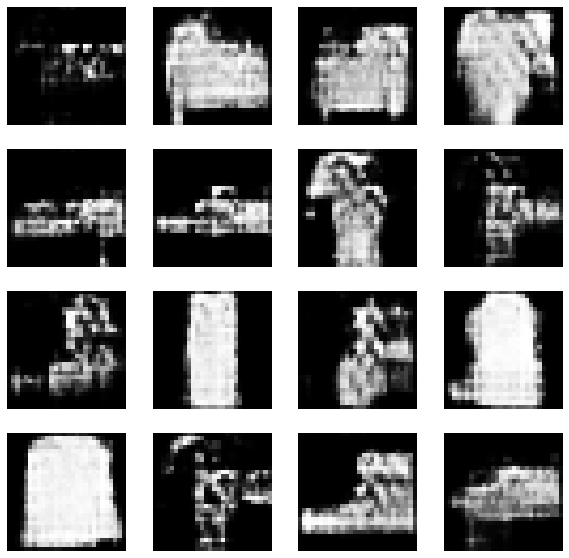

Epoch:  75


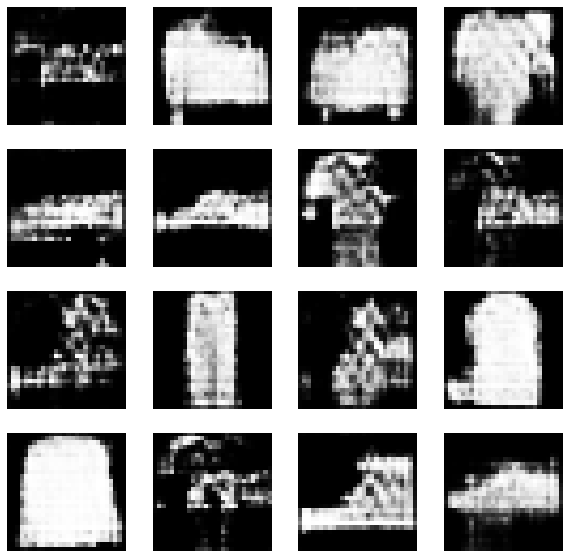

Epoch:  76


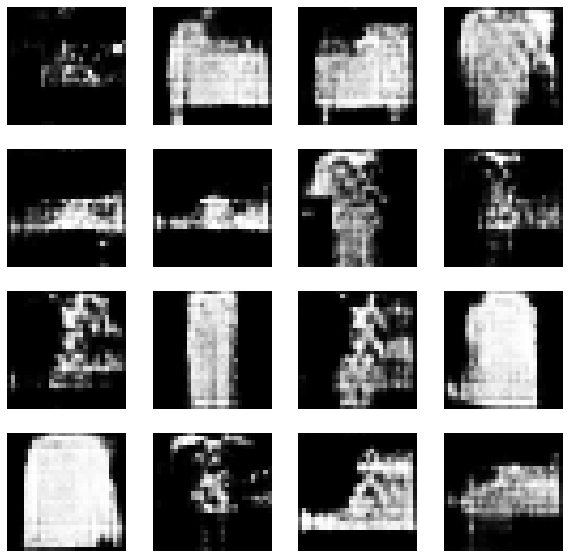

Epoch:  77


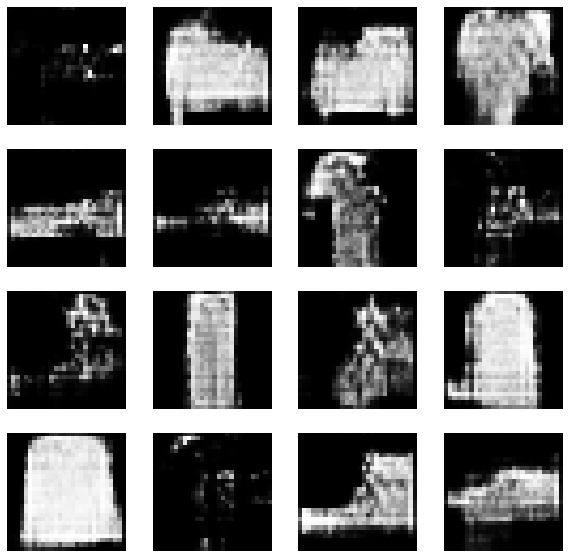

Epoch:  78


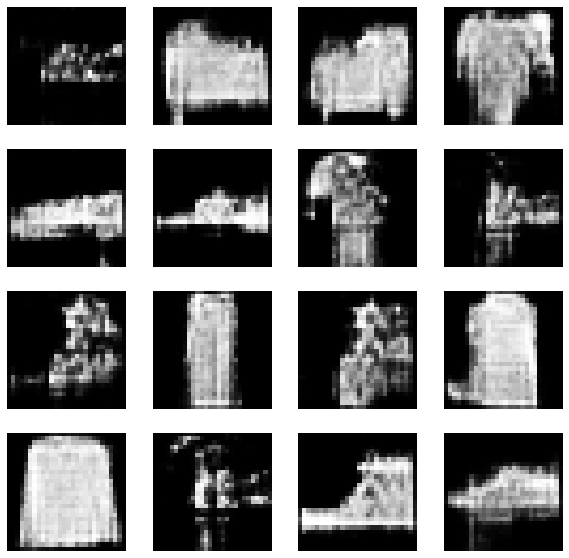

Epoch:  79


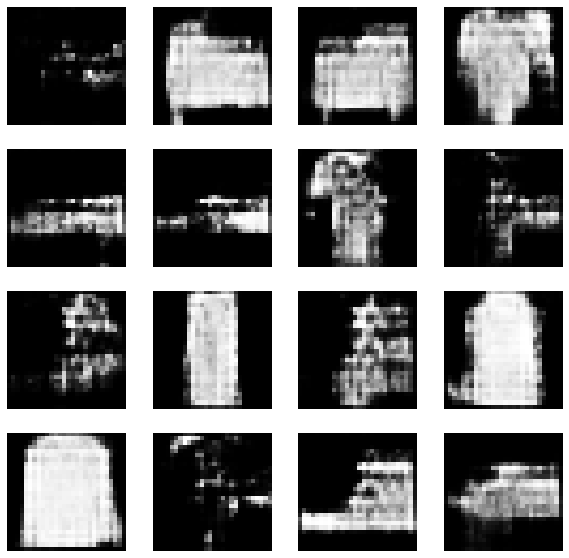

Epoch:  80


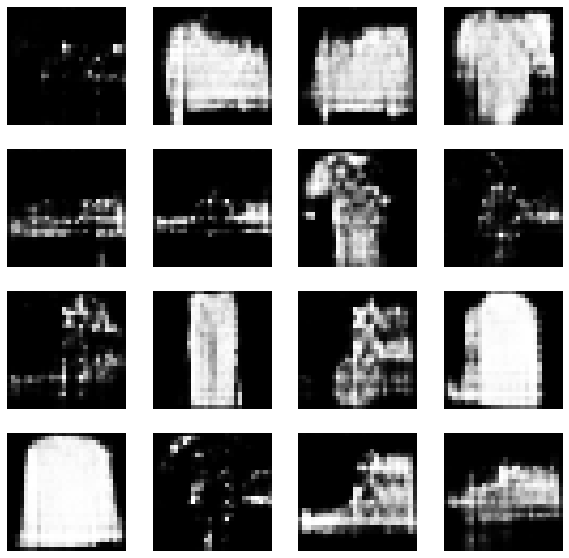

Epoch:  81


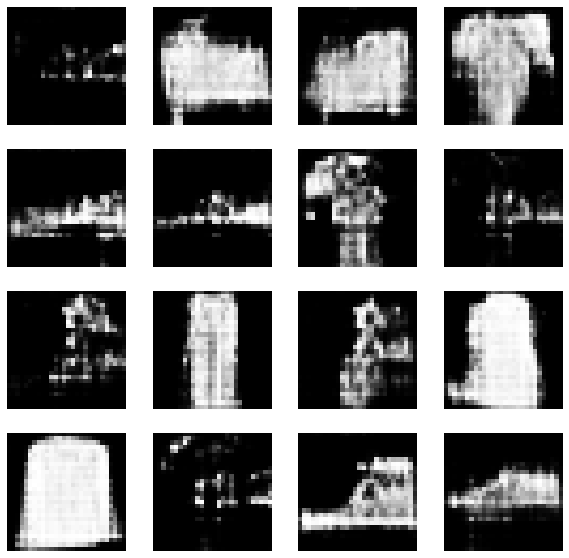

Epoch:  82


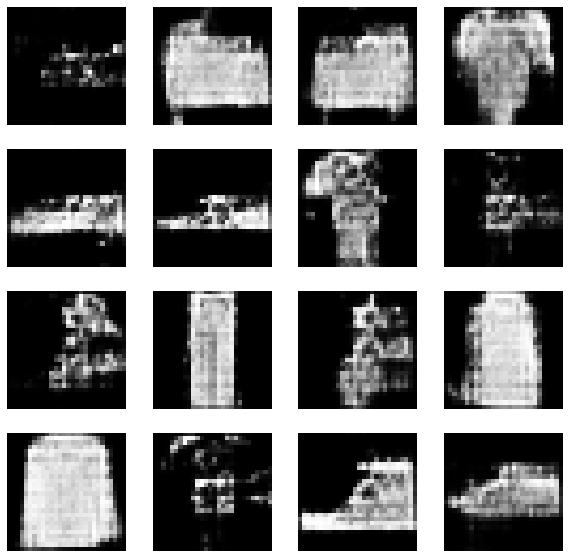

Epoch:  83


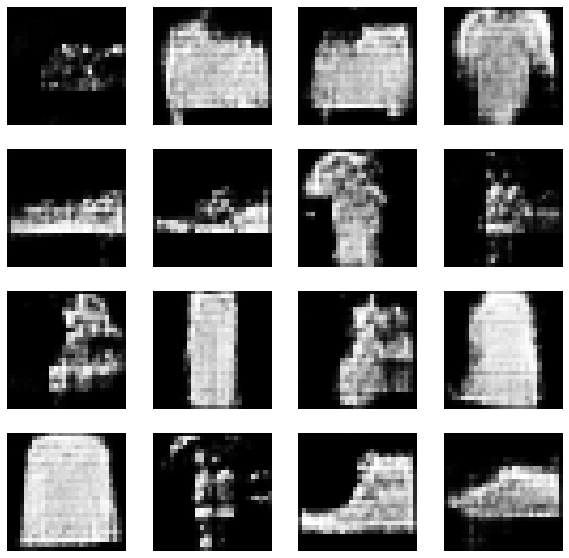

Epoch:  84


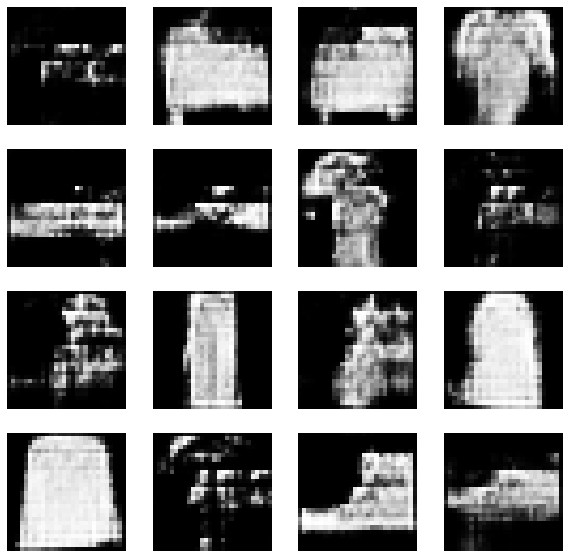

Epoch:  85


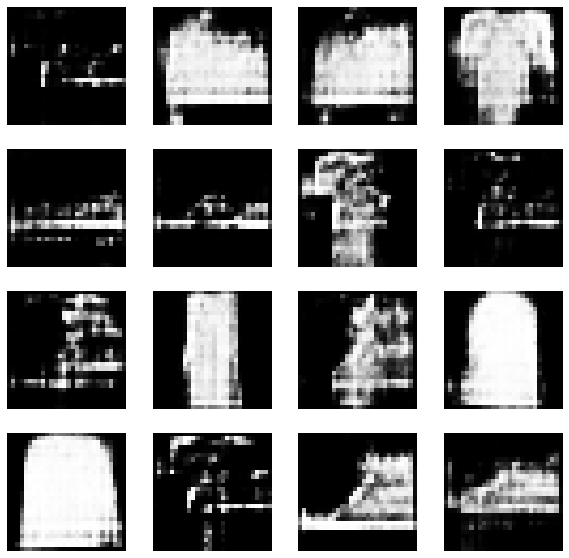

Epoch:  86


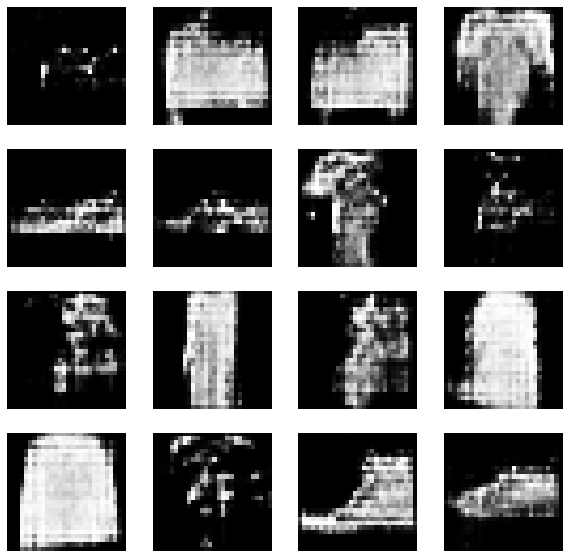

Epoch:  87


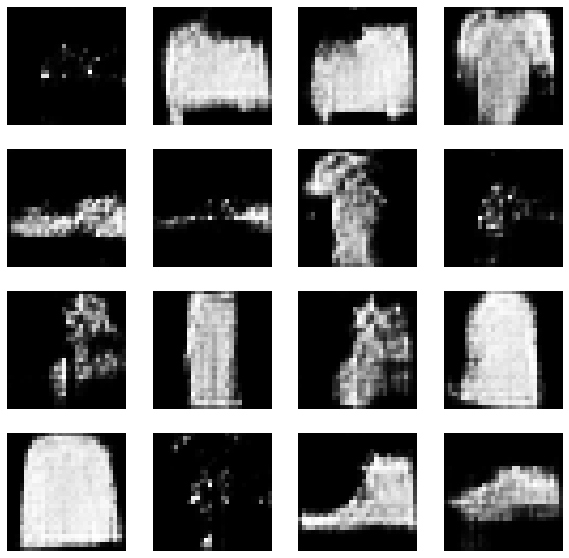

Epoch:  88


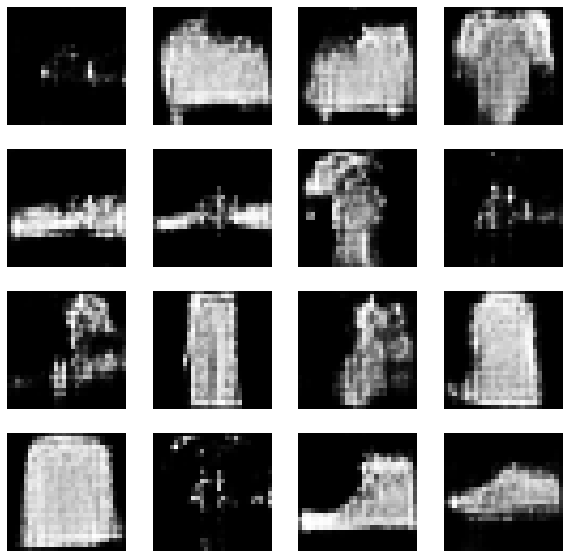

Epoch:  89


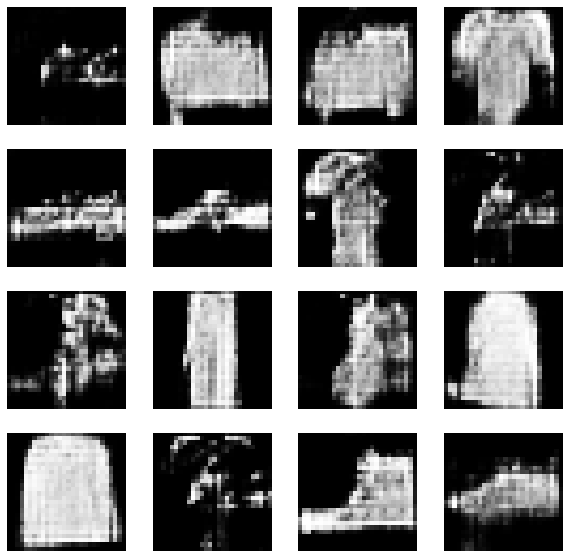

Epoch:  90


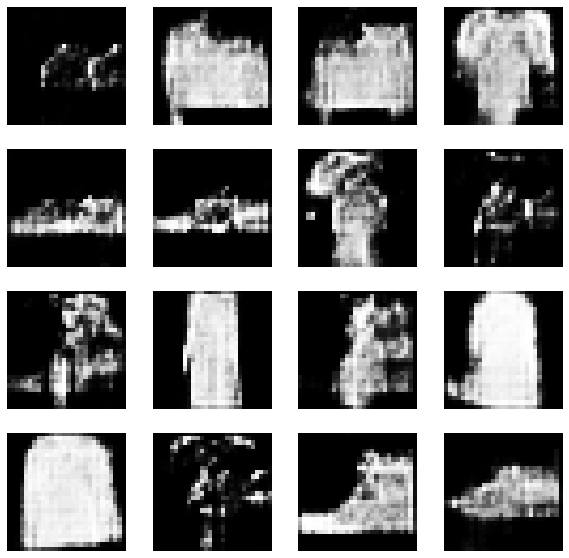

Epoch:  91


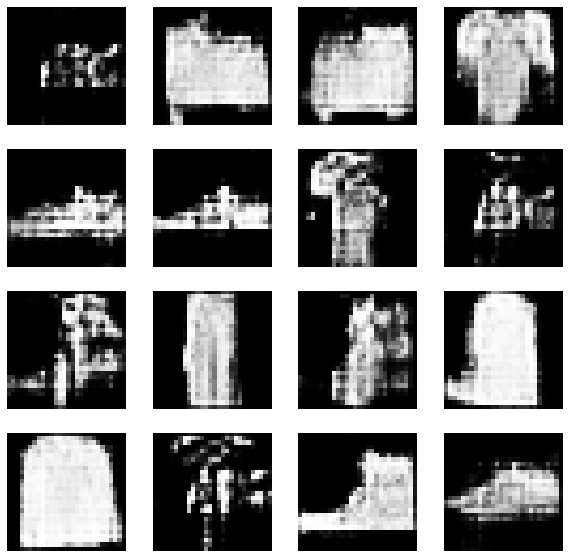

Epoch:  92


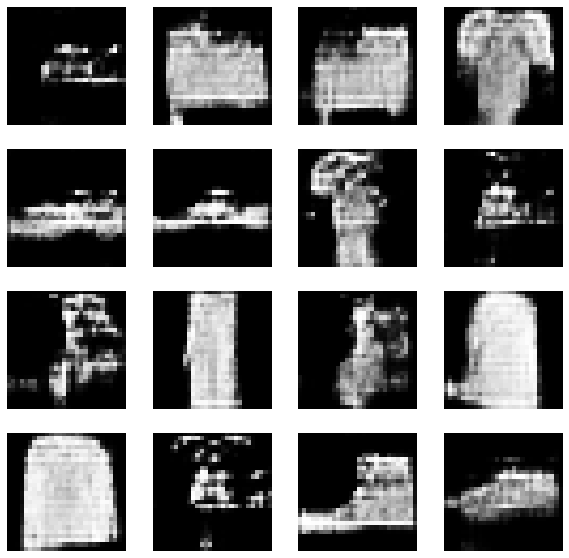

Epoch:  93


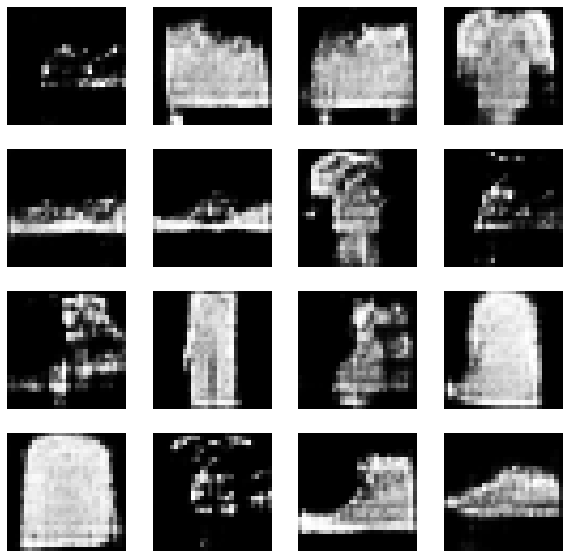

Epoch:  94


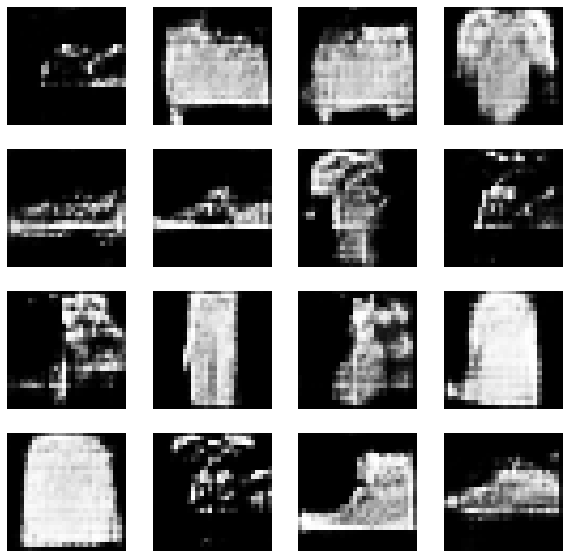

Epoch:  95


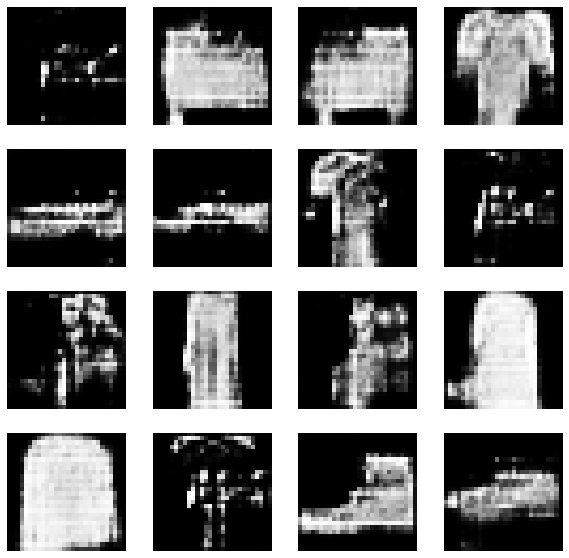

Epoch:  96


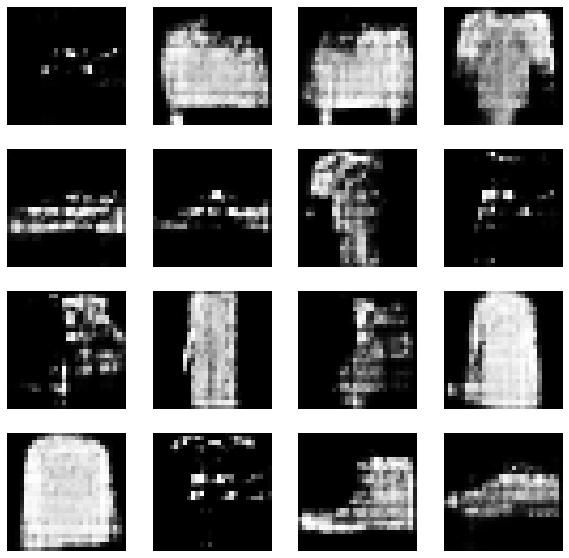

Epoch:  97


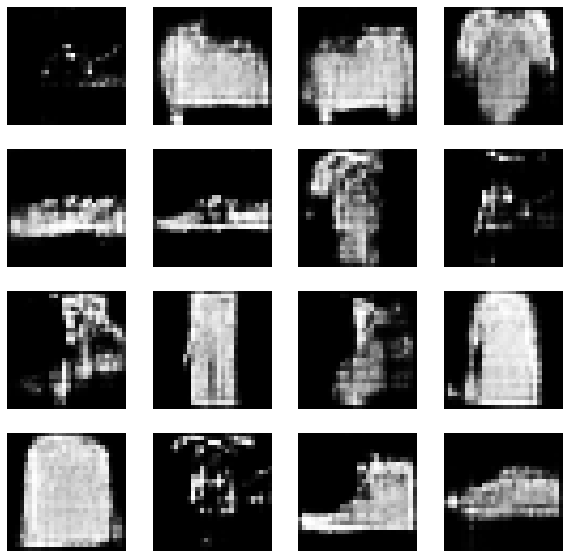

Epoch:  98


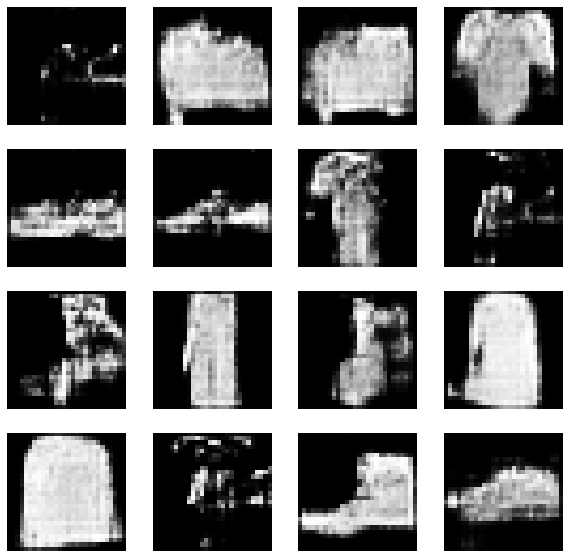

Epoch:  99


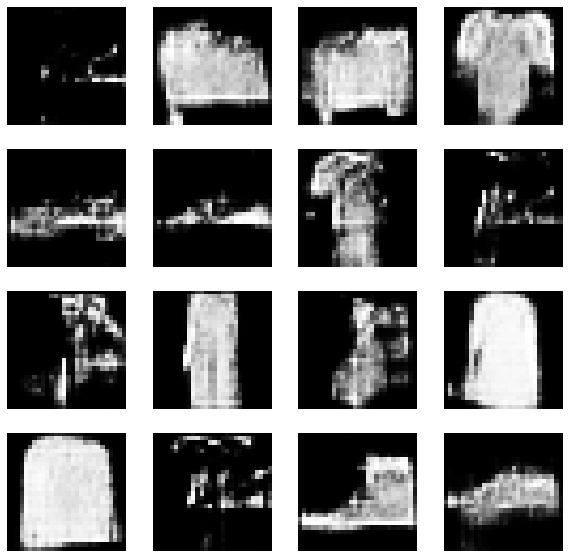

Epoch:  100


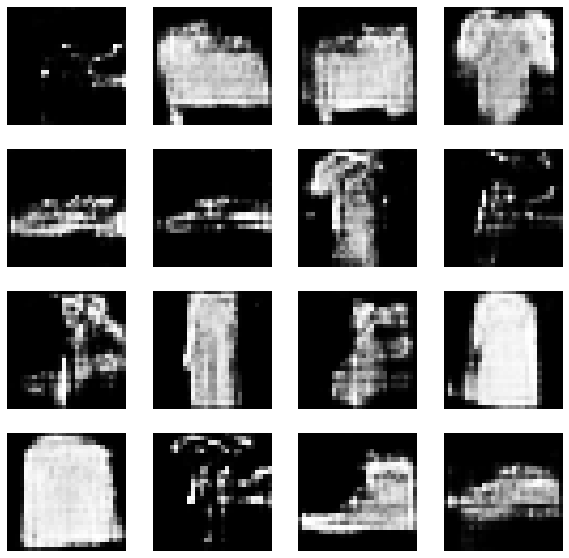

In [29]:
train(X_train,epochs,test_images)